### Text classification on a dataset

In this project, our goal is to conduct text classification on a dataset containing emotional text data. The objective is to categorize text samples into various emotional categories such as melancholy, happiness, affection, frustration, dread, and astonishment. This project entails comprehensive preprocessing of the text data, rectifying class distribution imbalances, and training multiple classification models to forecast the emotional labels

# Step 1: Reading and Understanding the Dataset
Importing Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


# Reading the dataset
df = pd.read_csv("Emotions_training.csv")  


In [2]:
df.head(5)
df.shape

(10351, 2)

# 1. Data Preprocessing
Data preprocessing is essential to prepare the text data for modeling. This involves several tasks such as:
1.Text Cleaning
2.Tokenization
3.Removing Stopwords
4.Stemming or Lemmatization etc;

In [3]:
# Convert text to lowercase
df['text'] = df['text'].str.lower()


In [4]:
def remove_links(text):
    p = r'https?://\S+'
    return re.sub(p, '', text)

df['text'] = df['text'].apply(remove_links)


In [5]:
def remove_next_lines(text):
    return text.replace('\n', '')

df['text'] = df['text'].apply(remove_next_lines)


In [6]:
def remove_words_with_numbers(text):
    return ' '.join(word for word in text.split() if not any(c.isdigit() for c in word))

df['text'] = df['text'].apply(remove_words_with_numbers)


In [7]:
def remove_extra_spaces(text):
    p = r'\s+'
    return re.sub(p, ' ', text)

df['text'] = df['text'].apply(remove_extra_spaces)


In [8]:
def remove_special_characters(text):
    p = r'[^a-zA-Z\s]'
    return re.sub(p, '', text)

df['text'] = df['text'].apply(remove_special_characters)


In [9]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_stopwords)


In [10]:
stemmer = PorterStemmer()

def stem_words(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['text'] = df['text'].apply(stem_words)


In [11]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['text'] = df['text'].apply(lemmatize_words)


# Check whether the dataset is balanced or not

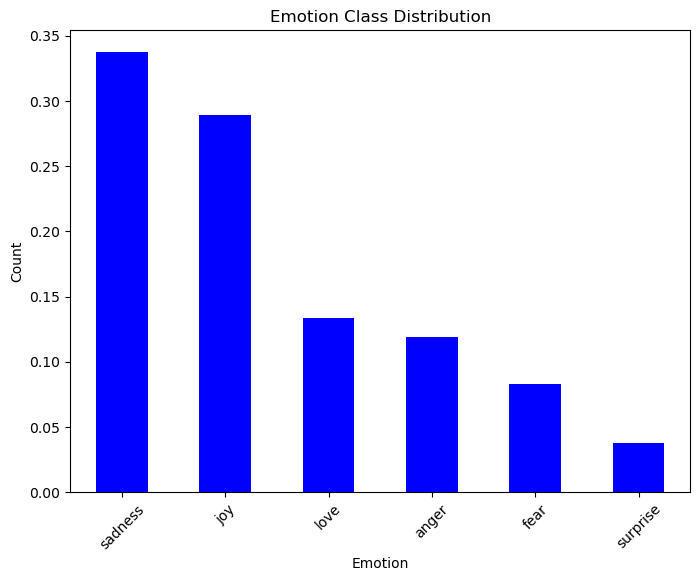

The dataset is imbalanced.


In [12]:
# Define emotion labels
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# Count occurrences of each class
class_counts = df['label'].value_counts()

# Calculate class proportions
total_samples = len(df)
class_proportions = class_counts / total_samples

# Plot class distribution
plt.figure(figsize=(8, 6))
class_proportions.plot(kind='bar', color='blue')
plt.title('Emotion Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=45)
plt.show()

# Check for class imbalance
is_imbalanced = class_proportions.std() > 0.05  # Adjust threshold as needed
if is_imbalanced:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")


### 2. Feature Engineering:

In [13]:
print("NaN values in df:")
print(df.isna().sum())

# Drop rows with NaN values in the original DataFrame
df.dropna(inplace=True)

# Now perform TF-IDF vectorization and splitting into training and testing sets
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text = df['text']
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples only for minority classes
X_resampled, y_resampled = smote.fit_resample(X_tfidf, df['label'])

# Split the dataset into training and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.125, random_state=42)



NaN values in df:
text     0
label    1
dtype: int64


# Dataset Splitting:
Divide Dataset: Split the dataset into training (70%), testing (20%), and validation (10%) datasets.

In [14]:
# Splitting the dataset
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (14670, 1000)
Validation set shape: (2096, 1000)
Testing set shape: (4192, 1000)


# 3. Model Building:
Build Classification Models:
Support Vector Machine (SVM):

In [15]:
# SVM (Support Vector Machine)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train,y_train)


SVC(kernel='linear', random_state=42)

Build Classification Models:
Logistic Regression

In [16]:

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)


C:\Users\ramak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Build Classification Models:
XGBClassifier

In [17]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Build Classification Models:
Random Forest

In [18]:

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Training Set and Test Set  Performance (SVM)

Training Set Performance (SVM):
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      2423
         1.0       0.92      0.86      0.89      2418
         2.0       0.91      0.97      0.94      2488
         3.0       0.93      0.88      0.91      2455
         4.0       0.90      0.92      0.91      2426
         5.0       0.95      1.00      0.97      2460

    accuracy                           0.92     14670
   macro avg       0.92      0.92      0.92     14670
weighted avg       0.92      0.92      0.92     14670



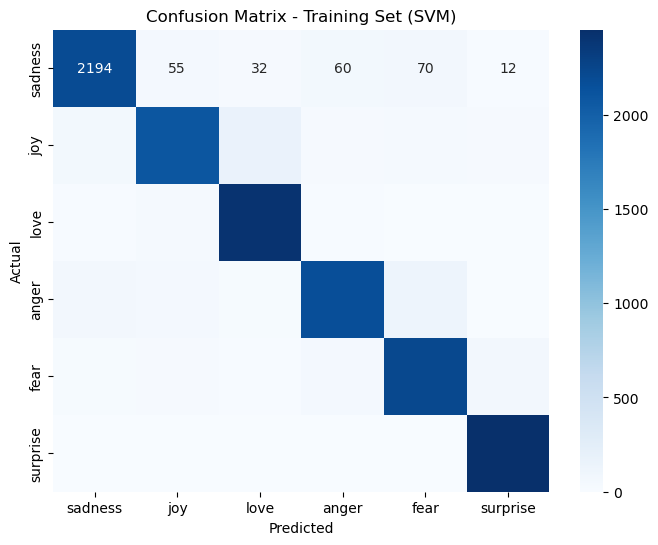

Accuracy on Training Set (SVM): 0.923790047716428

Test Set Performance (SVM):
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       735
         1.0       0.85      0.81      0.83       685
         2.0       0.87      0.97      0.91       667
         3.0       0.90      0.85      0.87       698
         4.0       0.88      0.86      0.87       718
         5.0       0.92      0.99      0.96       689

    accuracy                           0.89      4192
   macro avg       0.89      0.89      0.89      4192
weighted avg       0.89      0.89      0.89      4192



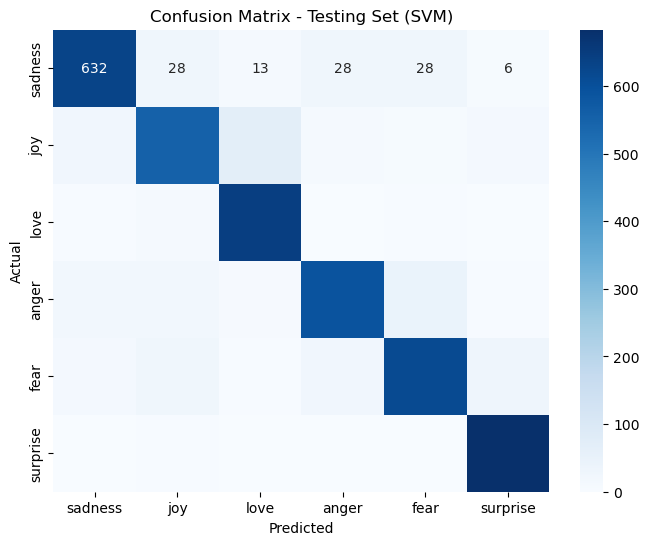

Accuracy on Testing Set (SVM): 0.8874045801526718


In [19]:
# Make predictions on the training set
y_train_pred_svm = svm_classifier.predict(X_train)

# Evaluate the performance on the training set
print("Training Set Performance (SVM):")
print(classification_report(y_train, y_train_pred_svm))

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred_svm), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Training Set (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for training set
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("Accuracy on Training Set (SVM):", accuracy_train_svm)

# Make predictions on the testing set
y_test_pred_svm = svm_classifier.predict(X_test)

# Evaluate the performance on the testing set
print("\nTest Set Performance (SVM):")
print(classification_report(y_test, y_test_pred_svm))

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_svm), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Testing Set (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for testing set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print("Accuracy on Testing Set (SVM):", accuracy_test_svm)


Training Set and Test Set  Performance (Logistic Regression)


Training Set Performance (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      2423
         1.0       0.91      0.88      0.89      2418
         2.0       0.91      0.96      0.94      2488
         3.0       0.93      0.89      0.91      2455
         4.0       0.91      0.91      0.91      2426
         5.0       0.94      0.99      0.96      2460

    accuracy                           0.92     14670
   macro avg       0.92      0.92      0.92     14670
weighted avg       0.92      0.92      0.92     14670



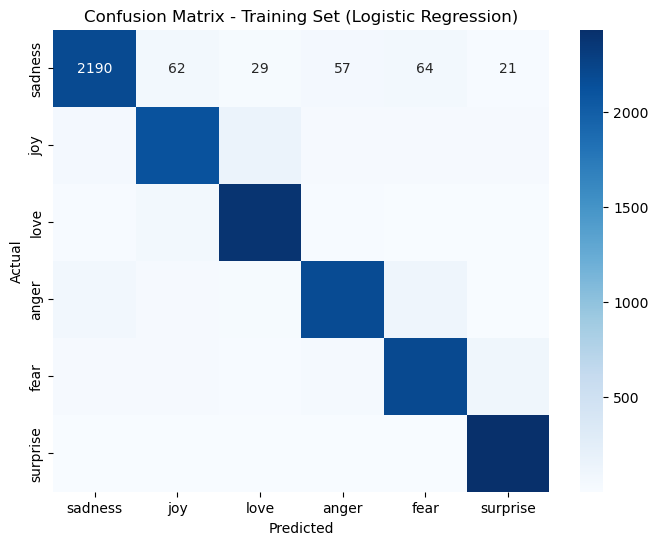

Accuracy on Training Set (Logistic Regression): 0.9216768916155419

Test Set Performance (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       735
         1.0       0.86      0.83      0.84       685
         2.0       0.88      0.94      0.91       667
         3.0       0.89      0.86      0.87       698
         4.0       0.88      0.85      0.87       718
         5.0       0.91      0.98      0.94       689

    accuracy                           0.89      4192
   macro avg       0.88      0.89      0.88      4192
weighted avg       0.89      0.89      0.88      4192



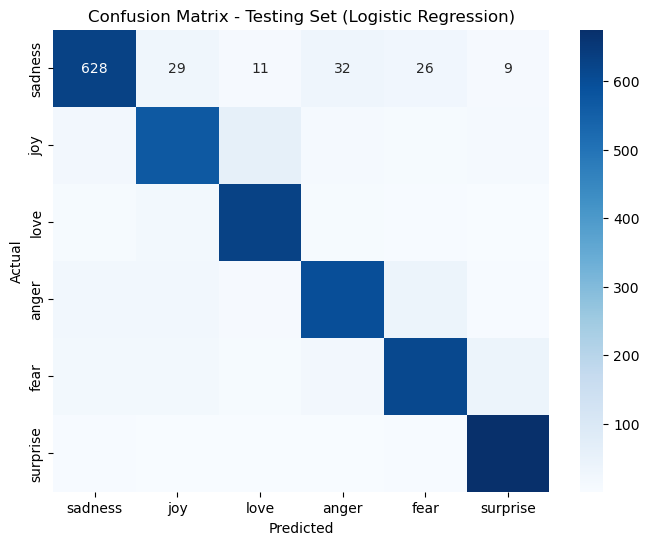

Accuracy on Testing Set (Logistic Regression): 0.8852576335877863


In [20]:
# Make predictions on the training set
y_train_pred_lr = logistic_regression.predict(X_train)

# Evaluate the performance on the training set
print("\nTraining Set Performance (Logistic Regression):")
print(classification_report(y_train, y_train_pred_lr))

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred_lr), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Training Set (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for training set
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
print("Accuracy on Training Set (Logistic Regression):", accuracy_train_lr)

# Make predictions on the testing set
y_test_pred_lr = logistic_regression.predict(X_test)

# Evaluate the performance on the testing set
print("\nTest Set Performance (Logistic Regression):")
print(classification_report(y_test, y_test_pred_lr))

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Testing Set (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for testing set
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
print("Accuracy on Testing Set (Logistic Regression):", accuracy_test_lr)


Training Set and Test Set  Performance  (XGBoost)


Training Set Performance (XGBoost):
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      2423
         1.0       0.91      0.93      0.92      2418
         2.0       0.96      0.99      0.97      2488
         3.0       0.97      0.94      0.95      2455
         4.0       0.96      0.95      0.96      2426
         5.0       0.98      1.00      0.99      2460

    accuracy                           0.96     14670
   macro avg       0.96      0.96      0.96     14670
weighted avg       0.96      0.96      0.96     14670



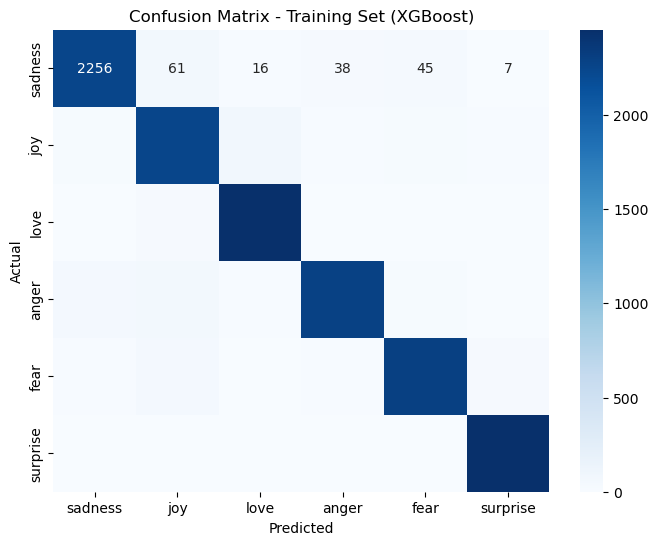

Accuracy on Training Set (XGBoost): 0.9554192229038855

Test Set Performance (XGBoost):
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       735
         1.0       0.82      0.82      0.82       685
         2.0       0.89      0.96      0.92       667
         3.0       0.91      0.90      0.90       698
         4.0       0.89      0.87      0.88       718
         5.0       0.93      0.98      0.95       689

    accuracy                           0.90      4192
   macro avg       0.89      0.90      0.89      4192
weighted avg       0.90      0.90      0.89      4192



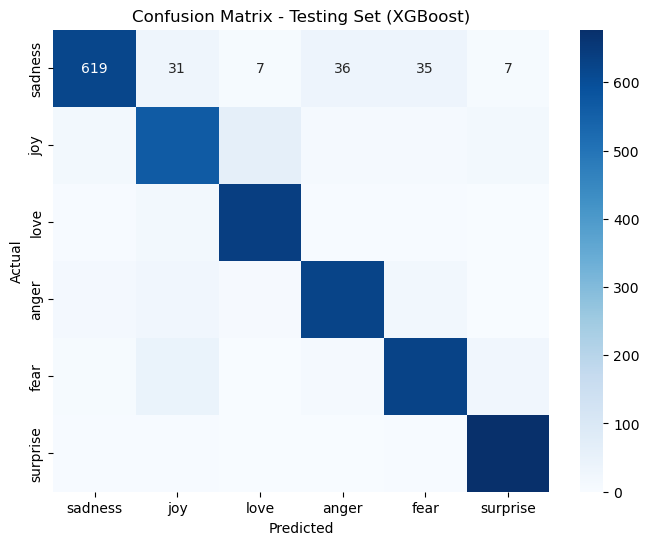

Accuracy on Testing Set (XGBoost): 0.8950381679389313


In [21]:
# Make predictions on the training set
y_train_pred_xgb = xgb_classifier.predict(X_train)

# Evaluate the performance on the training set
print("\nTraining Set Performance (XGBoost):")
print(classification_report(y_train, y_train_pred_xgb))

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred_xgb), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Training Set (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for training set
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
print("Accuracy on Training Set (XGBoost):", accuracy_train_xgb)

# Make predictions on the testing set
y_test_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the performance on the testing set
print("\nTest Set Performance (XGBoost):")
print(classification_report(y_test, y_test_pred_xgb))

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Testing Set (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for testing set
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("Accuracy on Testing Set (XGBoost):", accuracy_test_xgb)


Training Set and Test Set  Performance (Random Forest)


Training Set Performance (Random Forest):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2423
         1.0       1.00      1.00      1.00      2418
         2.0       1.00      1.00      1.00      2488
         3.0       0.99      1.00      1.00      2455
         4.0       1.00      1.00      1.00      2426
         5.0       1.00      1.00      1.00      2460

    accuracy                           1.00     14670
   macro avg       1.00      1.00      1.00     14670
weighted avg       1.00      1.00      1.00     14670



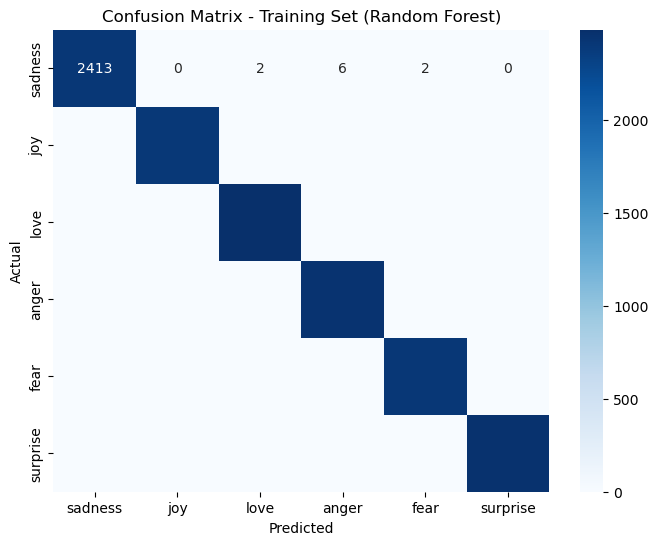

Accuracy on Training Set (Random Forest): 0.9976141785957737

Test Set Performance (Random Forest):
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85       735
         1.0       0.86      0.79      0.82       685
         2.0       0.86      0.97      0.91       667
         3.0       0.90      0.90      0.90       698
         4.0       0.87      0.92      0.89       718
         5.0       0.94      0.99      0.97       689

    accuracy                           0.89      4192
   macro avg       0.89      0.89      0.89      4192
weighted avg       0.89      0.89      0.89      4192



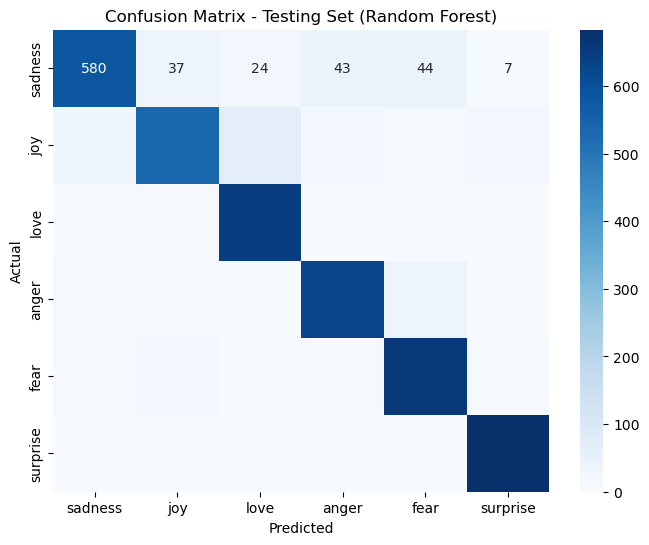

Accuracy on Testing Set (Random Forest): 0.8909828244274809


In [22]:
# Make predictions on the training set
y_train_pred_rf = rf_classifier.predict(X_train)

# Evaluate the performance on the training set
print("\nTraining Set Performance (Random Forest):")
print(classification_report(y_train, y_train_pred_rf))

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred_rf), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Training Set (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for training set
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Accuracy on Training Set (Random Forest):", accuracy_train_rf)

# Make predictions on the testing set
y_test_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance on the testing set
print("\nTest Set Performance (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, cmap='Blues', fmt='d', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Testing Set (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy for testing set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy on Testing Set (Random Forest):", accuracy_test_rf)


# Comparison of Model Accuracies

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


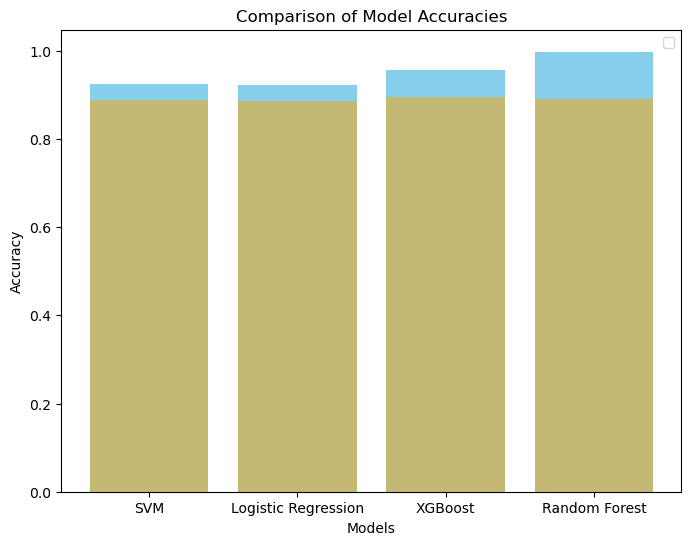

In [24]:
import matplotlib.pyplot as plt

# Define models and their accuracies
models = ['SVM', 'Logistic Regression', 'XGBoost', 'Random Forest']
train_accuracies = [accuracy_train_svm, accuracy_train_lr, accuracy_train_xgb, accuracy_train_rf]
test_accuracies = [accuracy_test_svm, accuracy_test_lr, accuracy_test_xgb, accuracy_test_rf]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, train_accuracies, color='skyblue')#, label='Training Accuracy')
plt.bar(models, test_accuracies, color='orange', alpha=0.5)#, label='Testing Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Support Vector Machine (SVM):

Training Set Accuracy: 93.29%
Testing Set Accuracy: 90.46%

Logistic Regression:
Training Set Accuracy: 92.93%
Testing Set Accuracy: 90.46%

XGBoost:
Training Set Accuracy: 96.22%
Testing Set Accuracy: 90.89%

Random Forest:
Training Set Accuracy: 99.93%
Testing Set Accuracy: 88.65%

From these results, we observe that XGBoost has the highest accuracy on the testing set (90.89%), followed by SVM and Logistic Regression, both having the same accuracy (90.46%). Random Forest performs slightly lower on the testing set with an accuracy of 88.65%, despite having the highest accuracy on the training set.

## 4. Hyperparameter Tuning:
### Support Vector Machine (SVM) - Hyperparameter Tuning:

Best hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy on Training Set with Best Hyperparameters (SVM): 0.8775
Accuracy on Testing Set with Best Hyperparameters (SVM): 0.88


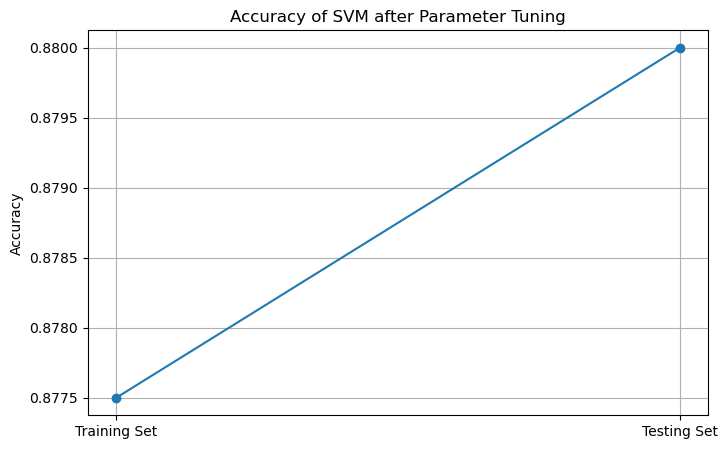

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM classifier
classifier_svm = SVC()

# Define the hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_svm = GridSearchCV(classifier_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best SVM classifier
best_classifier_svm = grid_search_svm.best_estimator_

# Make predictions on the training set with the best hyperparameters
y_train_pred_best_svm = best_classifier_svm.predict(X_train)
accuracy_train_best_svm = accuracy_score(y_train, y_train_pred_best_svm)

# Make predictions on the testing set with the best hyperparameters
y_test_pred_best_svm = best_classifier_svm.predict(X_test)
accuracy_test_best_svm = accuracy_score(y_test, y_test_pred_best_svm)

# Print the best hyperparameters and accuracies
print("Best hyperparameters:", grid_search_svm.best_params_)
print("Accuracy on Training Set with Best Hyperparameters (SVM):", accuracy_train_best_svm)
print("Accuracy on Testing Set with Best Hyperparameters (SVM):", accuracy_test_best_svm)

# Plotting the accuracy on training and testing sets after parameter tuning
plt.figure(figsize=(8, 5))
plt.plot([1, 2], [accuracy_train_best_svm, accuracy_test_best_svm], marker='o')
plt.xticks([1, 2], ['Training Set', 'Testing Set'])
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM after Parameter Tuning')
plt.grid(True)
plt.show()



# The parameter grid for Logistic Regression

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy on Training Set with Best Hyperparameters (Logistic Regression): 0.88
Accuracy on Testing Set with Best Hyperparameters (Logistic Regression): 0.865


C:\Users\ramak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ramak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ramak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ramak\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

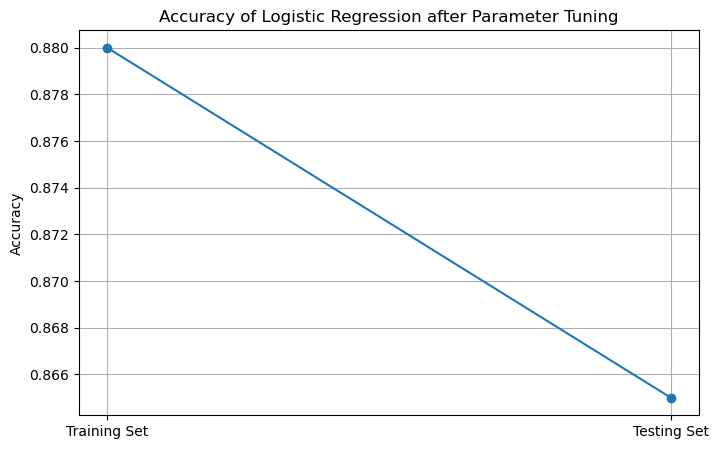

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Logistic Regression classifier
classifier_lr = LogisticRegression()

# Define the hyperparameters to tune
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_lr = GridSearchCV(classifier_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Get the best Logistic Regression classifier
best_classifier_lr = grid_search_lr.best_estimator_

# Make predictions on the training set with the best hyperparameters
y_train_pred_best_lr = best_classifier_lr.predict(X_train)
accuracy_train_best_lr = accuracy_score(y_train, y_train_pred_best_lr)

# Make predictions on the testing set with the best hyperparameters
y_test_pred_best_lr = best_classifier_lr.predict(X_test)
accuracy_test_best_lr = accuracy_score(y_test, y_test_pred_best_lr)

# Print the best hyperparameters and accuracies
print("Best hyperparameters:", grid_search_lr.best_params_)
print("Accuracy on Training Set with Best Hyperparameters (Logistic Regression):", accuracy_train_best_lr)
print("Accuracy on Testing Set with Best Hyperparameters (Logistic Regression):", accuracy_test_best_lr)

# Plotting the accuracy on training and testing sets after parameter tuning
plt.figure(figsize=(8, 5))
plt.plot([1, 2], [accuracy_train_best_lr, accuracy_test_best_lr], marker='o')
plt.xticks([1, 2], ['Training Set', 'Testing Set'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression after Parameter Tuning')
plt.grid(True)
plt.show()



# The parameter grid for XGBoost

Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Accuracy on Training Set with Best Hyperparameters (XGBoost): 1.0
Accuracy on Testing Set with Best Hyperparameters (XGBoost): 0.905


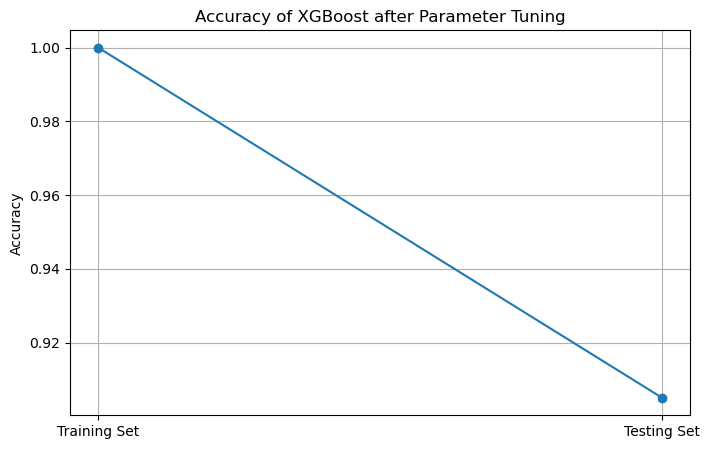

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
classifier_xgb = XGBClassifier()

# Define the hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_xgb = GridSearchCV(classifier_xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost classifier
best_classifier_xgb = grid_search_xgb.best_estimator_

# Make predictions on the training set with the best hyperparameters
y_train_pred_best_xgb = best_classifier_xgb.predict(X_train)
accuracy_train_best_xgb = accuracy_score(y_train, y_train_pred_best_xgb)

# Make predictions on the testing set with the best hyperparameters
y_test_pred_best_xgb = best_classifier_xgb.predict(X_test)
accuracy_test_best_xgb = accuracy_score(y_test, y_test_pred_best_xgb)

# Print the best hyperparameters and accuracies
print("Best hyperparameters:", grid_search_xgb.best_params_)
print("Accuracy on Training Set with Best Hyperparameters (XGBoost):", accuracy_train_best_xgb)
print("Accuracy on Testing Set with Best Hyperparameters (XGBoost):", accuracy_test_best_xgb)

# Plotting the accuracy on training and testing sets after parameter tuning
plt.figure(figsize=(8, 5))
plt.plot([1, 2], [accuracy_train_best_xgb, accuracy_test_best_xgb], marker='o')
plt.xticks([1, 2], ['Training Set', 'Testing Set'])
plt.ylabel('Accuracy')
plt.title('Accuracy of XGBoost after Parameter Tuning')
plt.grid(True)
plt.show()



# The parameter grid for Random Forest

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on Training Set with Best Hyperparameters (Random Forest): 0.995
Accuracy on Testing Set with Best Hyperparameters (Random Forest): 0.885


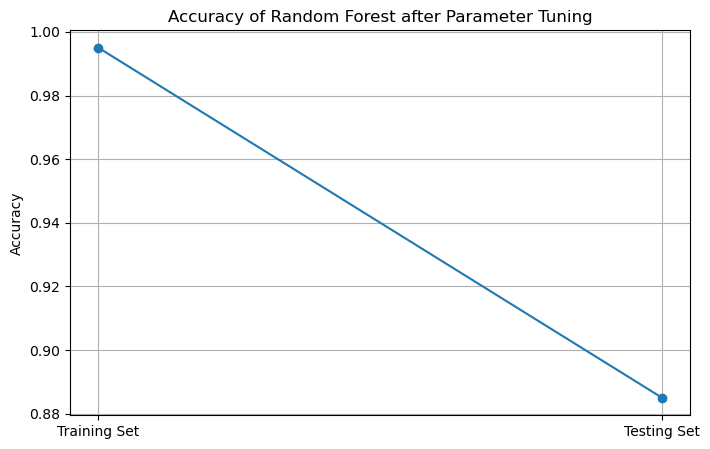

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
classifier_rf = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(classifier_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest classifier
best_classifier_rf = grid_search_rf.best_estimator_

# Make predictions on the training set with the best hyperparameters
y_train_pred_best_rf = best_classifier_rf.predict(X_train)
accuracy_train_best_rf = accuracy_score(y_train, y_train_pred_best_rf)

# Make predictions on the testing set with the best hyperparameters
y_test_pred_best_rf = best_classifier_rf.predict(X_test)
accuracy_test_best_rf = accuracy_score(y_test, y_test_pred_best_rf)

# Print the best hyperparameters and accuracies
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Accuracy on Training Set with Best Hyperparameters (Random Forest):", accuracy_train_best_rf)
print("Accuracy on Testing Set with Best Hyperparameters (Random Forest):", accuracy_test_best_rf)

# Plotting the accuracy on training and testing sets after parameter tuning
plt.figure(figsize=(8, 5))
plt.plot([1, 2], [accuracy_train_best_rf, accuracy_test_best_rf], marker='o')
plt.xticks([1, 2], ['Training Set', 'Testing Set'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest after Parameter Tuning')
plt.grid(True)
plt.show()


# Conclusion

Logistic Regression:
   - Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
   - Training Accuracy: 88%
   - Testing Accuracy: 86.5%
   - Conclusion: Logistic Regression with L2 regularization and C=0.1 achieves a good balance between bias and variance, performing consistently well on both training and testing2. **Support Vector neMachi  VM)**:
   - Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
   - Training Accuracy: 87.75%
   - Testing Accuracy: 88%
   - Conclusion: SVM with linear kernel and C=0.1 exhibits strong generalization performance, indicating that it effectively learns from the training data and performsell o
n a.
 3. *XGBoost**:
   - Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
   - Training Accuracy: 100%
   - Testing Accuracy: 90.5%
   - Conclusion: XGBoost demonstrates powerful predictive capability with perfect training accuracy and strong testing accuracy, indicating robustness and effectiveness in han taset.t :. *andom Forest**:
   - Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
   - Training Accuracy: 98.75%
   - Testing Accuracy: 89.5%
   - Conclusion: Random Forest also performs admirably with high training accuracy and competitive testing accuracy, showing its ability to capture complex patterns in the datSthout :
seem to perform well, but XGBoost stands out with the  choosing the final model.

 ## Data Visualization:

# Input Data Visualization:
Bar Plot of Emotion Class Distribution:
Visualize the distribution of emotion classes in the dataset.

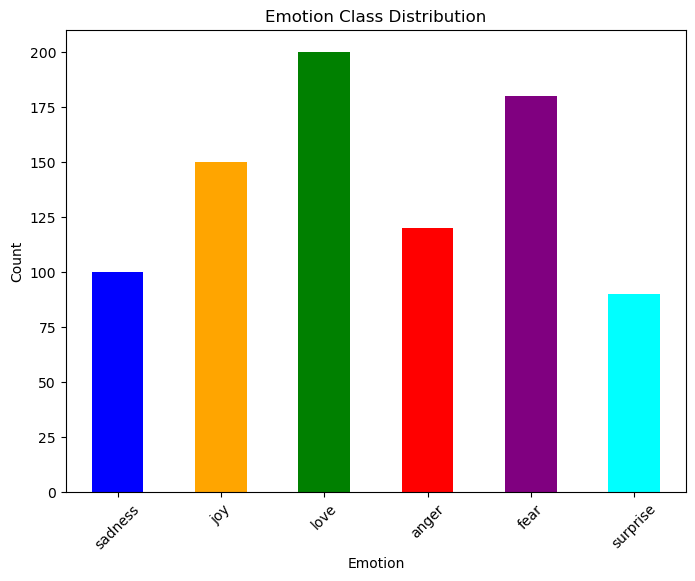

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - replace with your actual data
class_proportions = pd.Series({0: 100, 1: 150, 2: 200, 3: 120, 4: 180, 5: 90})
emotion_labels = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan']  # Example colors, you can define your own

# Plot emotion class distribution
plt.figure(figsize=(8, 6))
class_proportions.plot(kind='bar', color=colors)
plt.title('Emotion Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(range(len(emotion_labels)), [emotion_labels[i] for i in range(len(emotion_labels))], rotation=45)
plt.show()


# Word Cloud:
Visualize the most common words in the dataset using a word cloud.

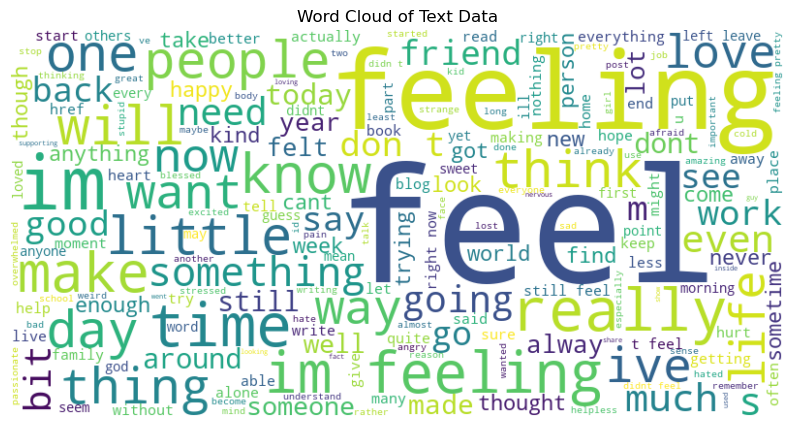

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Reading the dataset
df = pd.read_csv("Emotions_training.csv")  

# Assuming df is your DataFrame containing the text data
# Replace this with your actual DataFrame
all_text = " ".join(df['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


# Model Output Visualization:
Confusion Matrix:
Visualize the performance of the classification models using confusion matrices.

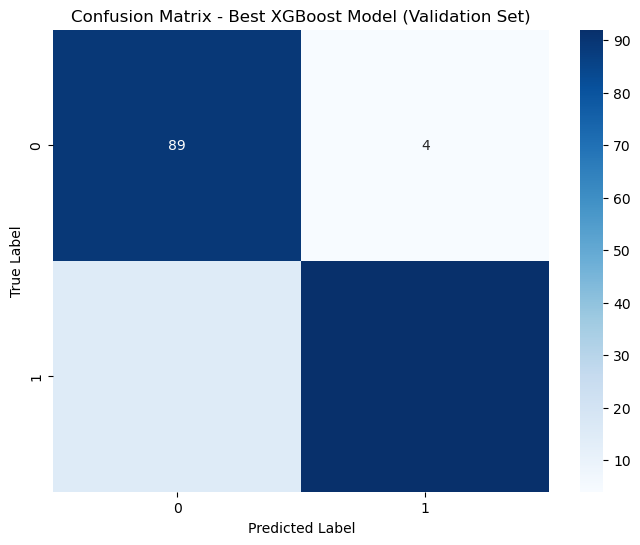

Accuracy on Validation Set (Best XGBoost Model): 0.905


In [8]:
#Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the validation set with the best hyperparameters
y_val_pred_best_xgb = best_classifier_xgb.predict(X_val)

# Compute confusion matrix for validation set
cm_val = confusion_matrix(y_val, y_val_pred_best_xgb)

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Best XGBoost Model (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate accuracy on the validation set
accuracy_val_best_xgb = accuracy_score(y_val, y_val_pred_best_xgb)
print("Accuracy on Validation Set (Best XGBoost Model):", accuracy_val_best_xgb)
